In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, SGD
# Plot
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

import os

path = '/content/drive/My Drive/sensor_data_processed_normalizing_the_label_with_hot_encoding_24_classes.csv'

data = pd.read_csv(path)

training_labels = ['Timestamps','bedroom_switch_middle_left',
 'entrance_heater_effective_setpoint',
 'bedroom_switch_middle_right',
 'kitchen_noise',
 'livingroom_couch_plug_consumption',
 'global_snow_ext',
 'bedroom_heater1_effective_setpoint',
 'global_lighting_power',
 'livingroom_heater2_base_setpoint',
 'kitchen_dishwasher_current',
 'toilet_coldwater_total',
 'kitchen_hood_voltage',
 'kitchen_washingmachine_partial_energy',
 'walkway_switch2_bottom_left',
 'livingroom_shutter5',
 'kitchen_hood_total_energy',
 'bathroom_heater_command',
 'walkway_noise',
 'entrance_noise',
 'livingroom_shutter4',
 'livingroom_switch2_top_left',
 'global_rain_ext',
 'global_wind_speed_ext',
 'global_waterheater_total_energy',
 'global_lighting_current',
 'livingroom_heater2_temperature',
 'livingroom_tv_status',
 'office_tv_plug_consumption',
 'kitchen_fridge_power',
 'bedroom_closet_door',
 'bathroom_luminosity',
 'livingroom_tv_plug_consumption',
 'office_AC_setpoint',
 'bathroom_switch_bottom_right',
 'bedroom_light4',
 'office_heater_effective_mode',
 'global_lighting_total_energy',
 'kitchen_cupboard3',
 'toilet_switch_left',
 'entrance_heater_base_setpoint',
 'office_heater_command',
 'bedroom_light2',
 'livingroom_table_luminosity',
 'global_voltage',
 'bedroom_temperature',
 'kitchen_fridge_door',
 'bathroom_sink_coldwater_total',
 'global_lighting_partial_energy',
 'livingroom_couch_noise',
 'global_temperature_feel_ext',
 'livingroom_humidity',
 'kitchen_oven_current',
 'livingroom_presence_table',
 'bathroom_switch_bottom_left',
 'livingroom_heater1_command',
 'staircase_light',
 'office_noise',
 'kitchen_sink_hotwater_total',
 'bathroom_switch_top_right',
 'bedroom_switch_bottom_left',
 'livingroom_presence_couch',
 'livingroom_heater2_effective_setpoint',
 'bedroom_presence',
 'toilet_switch_right',
 'bedroom_humidity',
 'livingroom_heater1_effective_mode',
 'bedroom_heater2_effective_setpoint',
 'livingroom_heater2_command',
 'bedroom_shutter1',
 'global_active_power',
 'walkway_switch1_bottom_left',
 'kitchen_hood_current',
 'entrance_heater_temperature',
 'bedroom_CO2',
 'livingroom_table_plug_consumption',
 'bathroom_CO2',
 'bathroom_temperature',
 'bedroom_drawer1',
 'office_switch_right',
 'global_heaters_temperature',
 'global_waterheater_current',
 'kitchen_dishwasher_voltage',
 'global_shutters_voltage',
 'walkway_switch1_bottom_right',
 'livingroom_heater1_effective_setpoint',
 'livingroom_light1',
 'bathroom_heater_temperature',
 'kitchen_cooktop_current',
 'entrance_switch_left',
 'toilet_coldwater_instantaneous',
 'kitchen_oven_voltage',
 'bathroom_sink_hotwater_instantaneous',
 'staircase_switch_right',
 'kitchen_sink_coldwater_instantaneous',
 'livingroom_heater2_effective_mode',
 'office_tv_status',
 'global_shutters_current',
 'kitchen_fridge_current',
 'kitchen_washingmachine_total_energy',
 'bedroom_shutter2',
 'bathroom_light2',
 'global_waterheater_partial_energy',
 'global_frequency',
 'kitchen_switch_bottom_right',
 'bedroom_door',
 'kitchen_luminosity',
 'bedroom_heater2_command',
 'entrance_heater_command',
 'global_pressure_ext',
 'kitchen_oven_partial_energy',
 'global_shutters_power',
 'office_luminosity',
 'kitchen_cooktop_total_energy',
 'kitchen_washingmachine_voltage',
 'bathroom_light1',
 'bedroom_luminosity',
 'office_presence',
 'bathroom_heater_effective_setpoint',
 'bathroom_shower_hotwater_instantaneous',
 'livingroom_switch1_top_left',
 'bathroom_humidity',
 'kitchen_cupboard5',
 'bathroom_shower_coldwater_total',
 'bathroom_shower_coldwater_instantaneous',
 'office_window',
 'kitchen_switch_bottom_left',
 'kitchen_dishwasher_partial_energy',
 'kitchen_fridge_voltage',
 'office_heater_effective_setpoint',
 'office_heater_temperature',
 'livingroom_window1',
 'bathroom_sink_hotwater_total',
 'kitchen_cooktop_voltage',
 'kitchen_hood_power',
 'kitchen_sink_hotwater_instantaneous',
 'global_current',
 'global_condition_id_ext',
 'livingroom_switch1_top_right',
 'office_AC_mode',
 'bedroom_heater2_effective_mode',
 'walkway_light',
 'bathroom_door',
 'global_clouds_ext',
 'global_shutters_total_energy',
 'bedroom_heater1_effective_mode',
 'bedroom_light1',
 'kitchen_cupboard1',
 'livingroom_temperature',
 'livingroom_CO2',
 'global_shutters_partial_energy',
 'bathroom_shower_hotwater_total',
 'kitchen_switch_top_right',
 'kitchen_cooktop_partial_energy',
 'global_waterheater_power',
 'kitchen_sink_coldwater_total',
 'kitchen_oven_total_energy',
 'global_power_factor',
 'kitchen_washingmachine_current',
 'global_coldwater_instantaneous',
 'office_desk_plug_consumption',
 'livingroom_switch1_bottom_left',
 'entrance_door',
 'global_active_energy',
 'global_coldwater_total',
 'bathroom_heater_effective_mode',
 'office_light',
 'walkway_switch1_top_right',
 'global_humidity_ext',
 'livingroom_AC_setpoint',
 'walkway_switch2_top_right',
 'bathroom_switch_top_left',
 'kitchen_cupboard2',
 'office_heater_base_setpoint',
 'bedroom_light3',
 'kitchen_dishwasher_total_energy',
 'livingroom_shutter3',
 'kitchen_light2',
 'kitchen_cooktop_power',
 'office_switch_left',
 'toilet_light',
 'livingroom_shutter2',
 'bathroom_presence',
 'livingroom_light2',
 'bedroom_switch_top_right',
 'livingroom_heater1_temperature',
 'bedroom_switch_top_left',
 'walkway_switch1_top_left',
 'livingroom_switch2_top_right',
 'walkway_switch2_bottom_right',
 'kitchen_dishwasher_power',
 'global_heaters_setpoint',
 'bedroom_AC_setpoint',
 'kitchen_temperature',
 'bedroom_heater2_temperature',
 'kitchen_fridge_partial_energy',
 'bedroom_switch_bottom_right',
 'office_shutter',
 'bedroom_drawer2',
 'global_temperature_ext',
 'bedroom_heater1_command',
 'bathroom_heater_base_setpoint',
 'bedroom_bed_pressure',
 'livingroom_table_noise',
 'global_lighting_voltage',
 'office_switch_middle',
 'global_gas_total',
 'global_waterheater_status',
 'office_door',
 'kitchen_washingmachine_power',
 'staircase_switch_left',
 'bedroom_heater2_base_setpoint',
 'entrance_heater_effective_mode',
 'bedroom_heater1_temperature',
 'entrance_light1',
 'livingroom_shutter1',
 'livingroom_heater1_base_setpoint',
 'kitchen_CO2',
 'walkway_switch2_top_left',
 'kitchen_switch_top_left',
 'kitchen_fridge_total_energy',
 'bathroom_shower_door',
 'bedroom_heater1_base_setpoint',
 'kitchen_light1',
 'kitchen_hood_partial_energy',
 'global_waterheater_voltage',
 'kitchen_cupboard4',
 'bathroom_sink_coldwater_instantaneous',
 'bedroom_noise',
 'kitchen_humidity',
 'kitchen_oven_power',
 'kitchen_presence',
 'livingroom_luminosity',
 'E',
 'ENE',
 'ESE',
 'N',
 'NE',
 'NNE',
 'NNW',
 'NW',
 'S',
 'SE',
 'SSE',
 'SSW',
 'SW',
 'W',
 'WNW',
 'WSW',
 'down',
 'equal',
 'up',
 'Couvert',
 'brouillard',
 'brume',
 'ensoleillé',
 'légères pluies',
 'nuageux',
 'partiellement ensoleillé',
 'peu nuageux',
 'cloudy',
 'few-showers',
 'fog',
 'mostly-cloudy-day',
 'partly-cloudy-day',
 'sunny']

classes_labels = ['Bathroom|Cleaning',
 'Bathroom|Showering',
 'Bathroom|Using_the_sink',
 'Bathroom|Using_the_toilet',
 'Bedroom|Cleaning',
 'Bedroom|Dressing',
 'Bedroom|Napping',
 'Bedroom|Reading',
 'Entrance|Entering',
 'Entrance|Leaving',
 'Kitchen|Cleaning',
 'Kitchen|Cooking',
 'Kitchen|Preparing',
 'Kitchen|Washing_the_dishes',
 'Living_room|Cleaning',
 'Living_room|Computing',
 'Living_room|Eating',
 'Living_room|Watching_TV',
 'Office|Cleaning',
 'Office|Computing',
 'Office|Watching_TV',
 'Staircase|Going_down',
 'Staircase|Going_up',
 'Toilet|Using_the_toilet']


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
X = data[training_labels]
y = data[classes_labels]
y = y.values
X = X.values

In [65]:
from sklearn.decomposition import PCA

In [66]:
pca=PCA(n_components=100)

In [67]:
pca.fit(X)

PCA(n_components=100)

In [68]:
x_pca=pca.transform(X)

In [69]:
X.shape

(378171, 266)

In [70]:
x_pca.shape

(378171, 100)

In [71]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_pca,y, test_size = 0.3)
x_test, x_val, y_test, y_val = train_test_split(x_test,y_test, test_size = 0.3)

In [72]:
x_train.shape[1]

100

# MLP Model Building

In [73]:
from keras.models import Sequential
from keras.layers import Dense,LSTM, Dropout, InputLayer, GRU
from keras.optimizers import RMSprop, SGD, Adam

import matplotlib.pyplot as plt
import os
os.environ['TF_ENABLE_CUDNN'] = '1'

from keras.layers import CuDNNLSTM



# hyper-parameters
num_classes = 24
model = Sequential()
# first layer with 
model.add(Dense(x_train.shape[1], activation='relu', input_shape=(x_train.shape[1],)))
# second layer with 
model.add(Dense((x_train.shape[1]+num_classes)/2, activation='relu'))
# Dropout of 50%
model.add(Dropout(0.5))
# Camada de 20 neurônios
model.add(Dense((x_train.shape[1]+num_classes)/2, activation='relu'))

# Classification Layer 
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 62)                6262      
                                                                 
 dropout_2 (Dropout)         (None, 62)                0         
                                                                 
 dense_10 (Dense)            (None, 62)                3906      
                                                                 
 dense_11 (Dense)            (None, 24)                1512      
                                                                 
Total params: 21,780
Trainable params: 21,780
Non-trainable params: 0
_________________________________________________________________


In [74]:
sgd = SGD(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [75]:
%%time
batch_size = 34
epochs = 30
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))

Epoch 1/30
7786/7786 [==============================] - 17s 2ms/step - loss: 1.4848 - accuracy: 0.6494 - val_loss: 0.9910 - val_accuracy: 0.6821
Epoch 2/30
7786/7786 [==============================] - 19s 2ms/step - loss: 0.8700 - accuracy: 0.7531 - val_loss: 0.6960 - val_accuracy: 0.8547
Epoch 3/30
7786/7786 [==============================] - 18s 2ms/step - loss: 0.6654 - accuracy: 0.8244 - val_loss: 0.5280 - val_accuracy: 0.8795
Epoch 4/30
7786/7786 [==============================] - 17s 2ms/step - loss: 0.5382 - accuracy: 0.8565 - val_loss: 0.4174 - val_accuracy: 0.9060
Epoch 5/30
7786/7786 [==============================] - 18s 2ms/step - loss: 0.4570 - accuracy: 0.8773 - val_loss: 0.3529 - val_accuracy: 0.9108
Epoch 6/30
7786/7786 [==============================] - 19s 2ms/step - loss: 0.4018 - accuracy: 0.8909 - val_loss: 0.3112 - val_accuracy: 0.9128
Epoch 7/30
7786/7786 [==============================] - 20s 3ms/step - loss: 0.3615 - accuracy: 0.9006 - val_loss: 0.2794 - val_ac

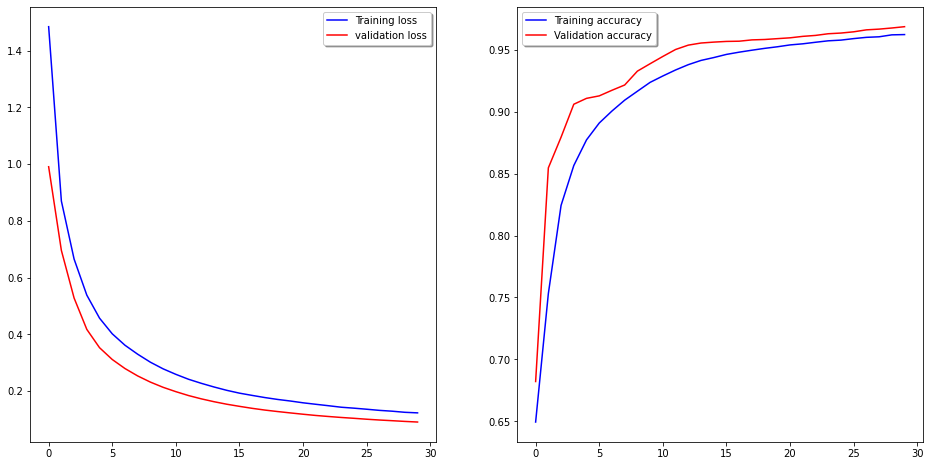

In [76]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [77]:
%%time
from sklearn.metrics import classification_report, confusion_matrix

score = model.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09073645621538162
Test accuracy: 0.968680202960968
CPU times: user 1.63 s, sys: 91.9 ms, total: 1.72 s
Wall time: 2.62 s


In [78]:
%%time
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08925343304872513
Test accuracy: 0.9687720537185669
CPU times: user 4.02 s, sys: 219 ms, total: 4.24 s
Wall time: 5.24 s


In [79]:
# Classification
y_pred = model.predict(x_test)

y_pred

2482/2482 [==============================] - 4s 1ms/step


array([[1.6653276e-11, 9.5700331e-12, 9.7600372e-11, ..., 2.8382005e-10,
        4.5722304e-11, 9.5414099e-10],
       [4.2411109e-04, 7.0879692e-06, 1.8650791e-04, ..., 1.4564951e-03,
        2.3084076e-03, 4.8256924e-04],
       [4.5932650e-11, 4.9624034e-11, 3.1508277e-10, ..., 2.5583933e-09,
        3.0200009e-10, 8.0004137e-09],
       ...,
       [2.7343113e-04, 9.3086535e-01, 6.6083409e-02, ..., 8.2420796e-05,
        1.5196863e-04, 9.3882882e-08],
       [1.4377237e-08, 2.3963169e-08, 7.2201686e-08, ..., 2.2782419e-07,
        3.4388897e-08, 3.2603327e-07],
       [7.7693781e-04, 5.1210259e-06, 2.7370884e-04, ..., 6.3628959e-04,
        2.4552410e-03, 2.5524371e-03]], dtype=float32)

In [80]:
for i in range(0,len(y_pred)):
# Get the index of the maximum value in the output list
  max_index = np.argmax(y_pred[i])
  # Create a binary vector with the maximum value as 1 and other values as 0
  y_pred[i] = np.zeros(len(y_pred[i]))

  y_pred[i][max_index] = 1

In [81]:
labels = ['Bathroom|Cleaning',
 'Bathroom|Showering',
 'Bathroom|Using_the_sink',
 'Bathroom|Using_the_toilet',
 'Bedroom|Cleaning',
 'Bedroom|Dressing',
 'Bedroom|Napping',
 'Bedroom|Reading',
 'Entrance|Entering',
 'Entrance|Leaving',
 'Kitchen|Cleaning',
 'Kitchen|Cooking',
 'Kitchen|Preparing',
 'Kitchen|Washing_the_dishes',
 'Living_room|Cleaning',
 'Living_room|Computing',
 'Living_room|Eating',
 'Living_room|Watching_TV',
 'Office|Cleaning',
 'Office|Computing',
 'Office|Watching_TV',
 'Staircase|Going_down',
 'Staircase|Going_up',
 'Toilet|Using_the_toilet']

In [82]:
df_pred = pd.DataFrame( y_pred,columns=labels)

In [83]:
df_pred

,Bathroom|Cleaning,Bathroom|Showering,Bathroom|Using_the_sink,Bathroom|Using_the_toilet,Bedroom|Cleaning,Bedroom|Dressing,Bedroom|Napping,Bedroom|Reading,Entrance|Entering,Entrance|Leaving,...,Living_room|Cleaning,Living_room|Computing,Living_room|Eating,Living_room|Watching_TV,Office|Cleaning,Office|Computing,Office|Watching_TV,Staircase|Going_down,Staircase|Going_up,Toilet|Using_the_toilet
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
79412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
79413,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [84]:
original_array_pred = df_pred.idxmax(axis=1)

In [85]:
original_array_pred

0                  Office|Computing
1        Kitchen|Washing_the_dishes
2                  Office|Computing
3             Living_room|Computing
4                  Office|Computing
                    ...            
79411              Office|Computing
79412              Office|Computing
79413            Bathroom|Showering
79414              Office|Computing
79415         Living_room|Computing
Length: 79416, dtype: object

In [86]:
df_test = pd.DataFrame( y_test,columns=labels)
original_array_test = df_test.idxmax(axis=1)
original_array_test

0                  Office|Computing
1        Kitchen|Washing_the_dishes
2                  Office|Computing
3              Living_room|Cleaning
4                  Office|Computing
                    ...            
79411              Office|Computing
79412              Office|Computing
79413            Bathroom|Showering
79414              Office|Computing
79415            Living_room|Eating
Length: 79416, dtype: object

In [87]:
cm = confusion_matrix(original_array_test,original_array_pred)

In [88]:
df_cm = pd.DataFrame( cm,columns=labels, index=labels)

In [89]:
df_cm

,Bathroom|Cleaning,Bathroom|Showering,Bathroom|Using_the_sink,Bathroom|Using_the_toilet,Bedroom|Cleaning,Bedroom|Dressing,Bedroom|Napping,Bedroom|Reading,Entrance|Entering,Entrance|Leaving,...,Living_room|Cleaning,Living_room|Computing,Living_room|Eating,Living_room|Watching_TV,Office|Cleaning,Office|Computing,Office|Watching_TV,Staircase|Going_down,Staircase|Going_up,Toilet|Using_the_toilet
Bathroom|Cleaning,0,0,79,0,0,10,0,1,0,0,...,0,0,6,0,0,0,0,0,0,0
Bathroom|Showering,0,2630,23,0,0,0,0,0,3,0,...,0,0,0,4,0,0,0,0,2,0
Bathroom|Using_the_sink,0,423,449,5,0,0,0,0,2,0,...,0,10,2,0,0,0,0,0,0,0
Bathroom|Using_the_toilet,0,13,183,70,0,0,5,0,0,0,...,0,0,0,0,0,2,0,0,0,0
Bedroom|Cleaning,0,0,0,0,0,30,3,26,0,0,...,0,0,5,0,0,0,0,0,0,0
Bedroom|Dressing,0,0,0,0,0,190,23,70,0,0,...,0,1,6,0,0,0,0,0,0,0
Bedroom|Napping,0,0,0,0,0,8,2942,4,0,0,...,0,0,2,0,0,0,0,0,0,0
Bedroom|Reading,0,0,0,0,0,4,0,3130,0,0,...,0,0,0,0,0,0,0,0,0,0
Entrance|Entering,0,0,0,0,0,0,0,0,231,67,...,0,2,2,3,0,0,0,0,0,0
Entrance|Leaving,0,0,0,0,0,0,0,0,58,127,...,0,0,4,0,0,0,2,0,0,0


In [90]:
df_cm.to_csv("confusion_matrix_MLP_PCA_24_100.csv",index=True)

In [91]:
# y_true and y_pred are your true and predicted labels, respectively
report = classification_report(y_test, y_pred, target_names=labels, output_dict=True)

# Calculate the weighted average of precision, recall, and F1 score
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
weights = np.sum(y_test, axis=0)
precision_weighted = np.sum(precision * weights) / np.sum(weights)
recall_weighted = np.sum(recall * weights) / np.sum(weights)
f1_score_weighted = np.sum(f1_score * weights) / np.sum(weights)

print("Precision:", precision_weighted)
print("Recall:", recall_weighted)
print("F1 score:", f1_score_weighted)

Precision: 0.9637476370576715
Recall: 0.9687720358617911
F1 score: 0.9622676022040939


In [93]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9687720358617911
